In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ngrams import corpus_from_file, Ngram

### Crear y fitear modelo

In [64]:
ngram_full = Ngram(5)
corpus = corpus_from_file("corpus.txt")
_ = ngram_full.fit(corpus)

### Generar texto

In [ ]:
ngram_full.generate(temperature=0.3)

" elaine: i don't know. it's just the last coupla days my mind has been, not good.\n </l>"

### _TODO_: Evaluación del modelo 

In [ ]:
from sklearn.model_selection import train_test_split

ngram_split = Ngram(5)
train, test = train_test_split(corpus, test_size=0.2, random_state=42, shuffle=True)
ngram_split.fit(train)

print(ngram_split.perplexity(test))

3.794962690947059e-07


In [6]:
test[11]

"KRAMER: Oh, yeah yeah, I have to. I'm your fiancé, Peter Von Nostrand.\n"

In [7]:
from matplotlib import pyplot as plt

## Experimentación

In [17]:
from tqdm import tqdm

100%|██████████| 9/9 [00:19<00:00,  2.13s/it]


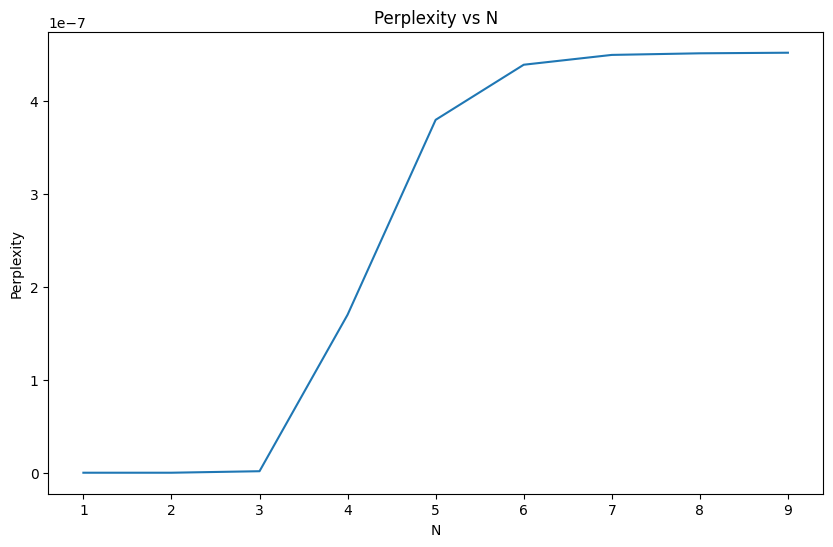

In [ ]:
# ¿Como es la calidad de los textos generados, a medida que aumentan n y/o la cantidad de datos de entrenamiento? ¿Que tipos de errores seproducen?

ppls = []
precisions = []
bleus = []

rg = range(1, 10)

for i in tqdm(rg):
    ngram = Ngram(i)
    ngram.fit(train)
    ppls.append(ngram.perplexity(test))

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(rg, ppls)
ax.set_xlabel("N")
ax.set_ylabel("Perplexity")
# title
plt.title("Perplexity vs N")

# save plot
plt.savefig("figures/perplexity_vs_n_seinfeld.png")

In [75]:
import numpy as np

In [80]:
# ¿Como es la calidad de los textos generados, a medida que aumentan n y/o la cantidad de datos de entrenamiento? ¿Que tipos de errores seproducen?

import numpy as np

ppls = []
precisions = []
bleus = []

rg = range(1, 11)

for i in tqdm(rg):
    ngram = Ngram(i)
    # Fit models with different sizes of the training data based on the value of i
    # ngram.fit(train.sample(frac=0.1*i))
    ngram.fit(np.random.choice(train, int(0.1*i*len(train)), replace=False))
    ppls.append(ngram.perplexity(test))

100%|██████████| 10/10 [00:24<00:00,  2.47s/it]


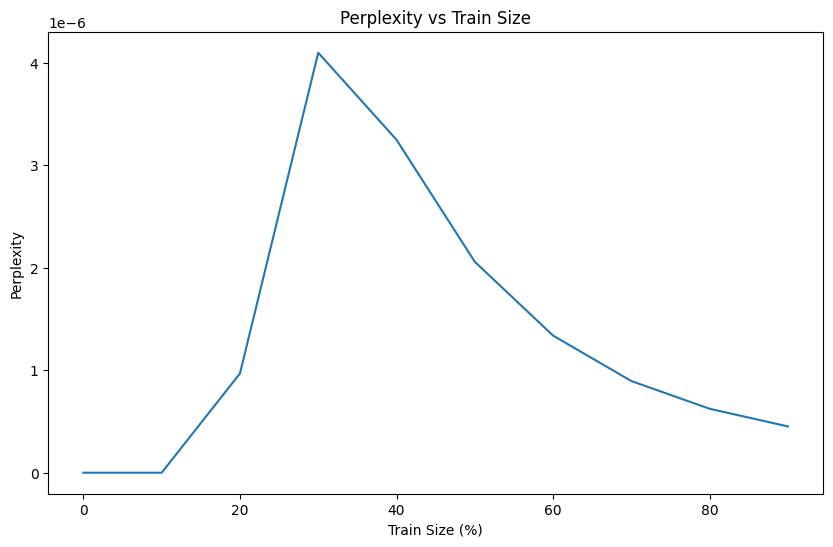

In [81]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(0, 99, 10), ppls)
ax.set_xlabel("Train Size (%)")
ax.set_ylabel("Perplexity")
# title
plt.title("Perplexity vs Train Size")

# save plot
plt.savefig("figures/perplexity_vs_train_size_seinfeld.png")

## Generación

In [65]:
ngram_full.generate(temperature=0.3)

" elaine: i don't know. but it's none of my business. but you should try to find out everything you can about these people - and i mean everything.\n </l>"

In [71]:
texts = []

for i in range(5):
    texts.append(ngram_full.generate(temperature=0.3, context="jerry:")[:-6])

# Bullet points
md = "\n".join([f"- {text}" for text in texts])
print(md)

-  i don't know what to do so i put it in a garage.
-  i don't know.
-  you know i don't get you seinfeld. you want something one day. the next day you don't have to do this! this guy is waiting in my house.
-  i don't know what to do. so i just stood there like – remember how quayle looked when benson gave him that kennedy line? that's what i looked like.
-  i don't know.


In [72]:
texts = []

for i in range(5):
    texts.append(ngram_full.generate(temperature=0.5, context="jerry:")[:-6])

# Bullet points
md = "\n".join([f"- {text}" for text in texts])
print(md)

-  george, here's the book. don't let anybody see it. don't let anything happen to it.
-  i don't understand it. i haven't read the manual. ooh!" you get my drift.
-  i don't know and i didn't want to talk to you. goodbye.
-  what's the matter?
-  oh, i don't know. i can't think of any solution, unless of course they should meet with some unfortunate accident. what do you think of this shirt?


In [73]:
texts = []

for i in range(5):
    texts.append(ngram_full.generate(temperature=1, context="jerry:")[:-6])

# Bullet points
md = "\n".join([f"- {text}" for text in texts])
print(md)

-  all right, look, we're late. thank you very much...
-  ah, you're better off. now you can just let it go.
-  you think you can handle that, numb nuts?
-  ah..........
-  would you?


In [86]:
scene = ngram_full.generate_scene(temperature=0.9)
print(scene)

 postal worker danny: why start now?
 </l> jerry: you don't understand, i haven't been together with rachel for like three weeks. first i was on the road, then my parents show up, i'm getting a little uncomfortable jerry: hi. can i use your place? i got a bunch of friends coming over this weekend.
 </l> george: yeah my parents have it. sometimes it skips a generation.
 </l> salesman: (angry) all you people with hair think you're so damn superior! you have no idea how sick i am of running around town looking for socks.
 </l></s>
